# Analisis Hasil Eksperimen

## Network Definition

Analisis hasil pembentukan topologi jaringan.

In [2]:
import json
with open('data/networkDefinition.json', 'r') as file:
    network_definition = json.load(file)

"""
Struktur dari networkDefinition.json:
{"entity": [
    list of device, each with:
    {
        id: int,      # id dari device/node
        RAM: int,     # RAM dari device (MB)
        IPT: int,     # IPT (Instruction Per Time) dari device (instr/ms)
        TB: float,    # storage dari device (TB)
        TYPE: string, # tipe dari device: CLOUD, FG, CFG, FOG
    }
]},
{"link": [
    list of edge/link, each with:
    {
        s: int,       # source node id
        d: int,       # destination node id
        PR: int,      # propagation time (ms) atau delay saat propagasi
        BW: int,      # bandwidth dari link (bytes/ms)
    }
]}
"""


'\nStruktur dari networkDefinition.json:\n{"entity": [\n    list of device, each with:\n    {\n        id: int,      # id dari device/node\n        RAM: int,     # RAM dari device (MB)\n        IPT: int,     # IPT (Instruction Per Time) dari device (instr/ms)\n        TB: float,    # storage dari device (TB)\n        TYPE: string, # tipe dari device: CLOUD, FG, CFG, FOG\n    }\n]},\n{"link": [\n    list of edge/link, each with:\n    {\n        s: int,       # source node id\n        d: int,       # destination node id\n        PR: int,      # propagation time (ms) atau delay saat propagasi\n        BW: int,      # bandwidth dari link (bytes/ms)\n    }\n]}\n'

In [4]:
import networkx as nx

G = nx.Graph()

# Tambahkan node dengan semua atribut
for node in network_definition['entity']:
    node_id = node['id']
    node_attrs = {k: v for k, v in node.items() if k != 'id'}
    G.add_node(node_id, **node_attrs)

print(f"Total nodes ditambahkan: {G.number_of_nodes()}")

# Tambahkan edge dengan semua atribut
for link in network_definition['link']:
    source = link['s']
    dest = link['d']
    edge_attrs = {k: v for k, v in link.items() if k not in ['s', 'd']}
    G.add_edge(source, dest, **edge_attrs)

print(f"Total edges ditambahkan: {G.number_of_edges()}")

# Tampilkan informasi graf
print("\nInformasi Graf:")
print(f"Nodes: {G.number_of_nodes()}")
print(f"Edges: {G.number_of_edges()}")

# Tampilkan contoh node dengan atribut
if G.nodes():
    sample_node = list(G.nodes(data=True))[0]
    print(f"\nSampel node: {sample_node}")

# Tampilkan contoh edge dengan atribut
if G.edges():
    sample_edge = list(G.edges(data=True))[0]
    print(f"Sampel edge: {sample_edge}")

# Kategorisasi node berdasarkan type
node_types = {}
for node_id, attrs in G.nodes(data=True):
    node_type = attrs.get('type', 'FOG')  # default FOG jika tidak ada type
    if node_type not in node_types:
        node_types[node_type] = []
    node_types[node_type].append(node_id)

print("\nDistribusi node berdasarkan jenisnya:")
for node_type, nodes in node_types.items():
    print(f"{node_type}: {len(nodes)} nodes - {nodes}")

Total nodes ditambahkan: 101
Total edges ditambahkan: 201

Informasi Graf:
Nodes: 101
Edges: 201

Sampel node: (0, {'RAM': 10, 'IPT': 770, 'TB': 36.53699266881228, 'type': 'CFG'})
Sampel edge: (0, 1, {'PR': 4, 'BW': 75000})

Distribusi node berdasarkan jenisnya:
CFG: 5 nodes - [0, 1, 2, 9, 17]
FOG: 70 nodes - [3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 33, 34, 35, 36, 38, 39, 40, 42, 43, 45, 46, 48, 50, 51, 52, 53, 55, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 75, 78, 81, 82, 83, 84, 87, 88, 91, 92, 95, 96, 97, 98]
FG: 25 nodes - [7, 25, 31, 32, 37, 41, 44, 47, 49, 54, 56, 57, 73, 74, 76, 77, 79, 80, 85, 86, 89, 90, 93, 94, 99]
CLOUD: 1 nodes - [100]


In [ ]:
# Analisis resource
print("=== ANALISIS RESOURCE ===")
total_ram = sum(G.nodes[node]['RAM'] for node in G.nodes())
total_storage = sum(G.nodes[node].get('TB', 0) for node in G.nodes())
avg_ipt = sum(G.nodes[node]['IPT'] for node in G.nodes()) / G.number_of_nodes()

print(f"Total RAM dalam jaringan: {total_ram} MB")
print(f"Total Storage dalam jaringan: {total_storage:.2f} TB")
print(f"Average IPT: {avg_ipt:.2f} instr/ms")

# Resource per tipe node
print("\nResource per tipe node:")
for node_type, nodes in node_types.items():
    if nodes:  # Pastikan ada node dengan tipe ini
        type_ram = sum(G.nodes[node]['RAM'] for node in nodes) / len(nodes)
        type_storage = sum(G.nodes[node].get('TB', 0) for node in nodes) / len(nodes)
        type_avg_ipt = sum(G.nodes[node]['IPT'] for node in nodes) / len(nodes)
        print(f"  {node_type}: Avg RAM={type_ram}MB, Avg Storage={type_storage:.2f}TB, Avg IPT={type_avg_ipt:.2f}")

=== ANALISIS RESOURCE ===
Total RAM dalam jaringan: 10000000000001857 MB
Total Storage dalam jaringan: 4706.78 TB
Average IPT: 693.98 instr/ms

Resource per tipe node:
  CFG: Avg RAM=18.8MB, Avg Storage=30.50TB, Avg IPT=718.60
  FOG: Avg RAM=18.814285714285713MB, Avg Storage=46.06TB, Avg IPT=602.80
  FG: Avg RAM=17.88MB, Avg Storage=53.19TB, Avg IPT=572.12
  CLOUD: Avg RAM=1e+16MB, Avg Storage=0.00TB, Avg IPT=10000.00


CLOUD: 1, CFG: 5, FOG: 70, FG: 25


C:\Users\hafid\AppData\Local\Temp\ipykernel_13256\2142972132.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


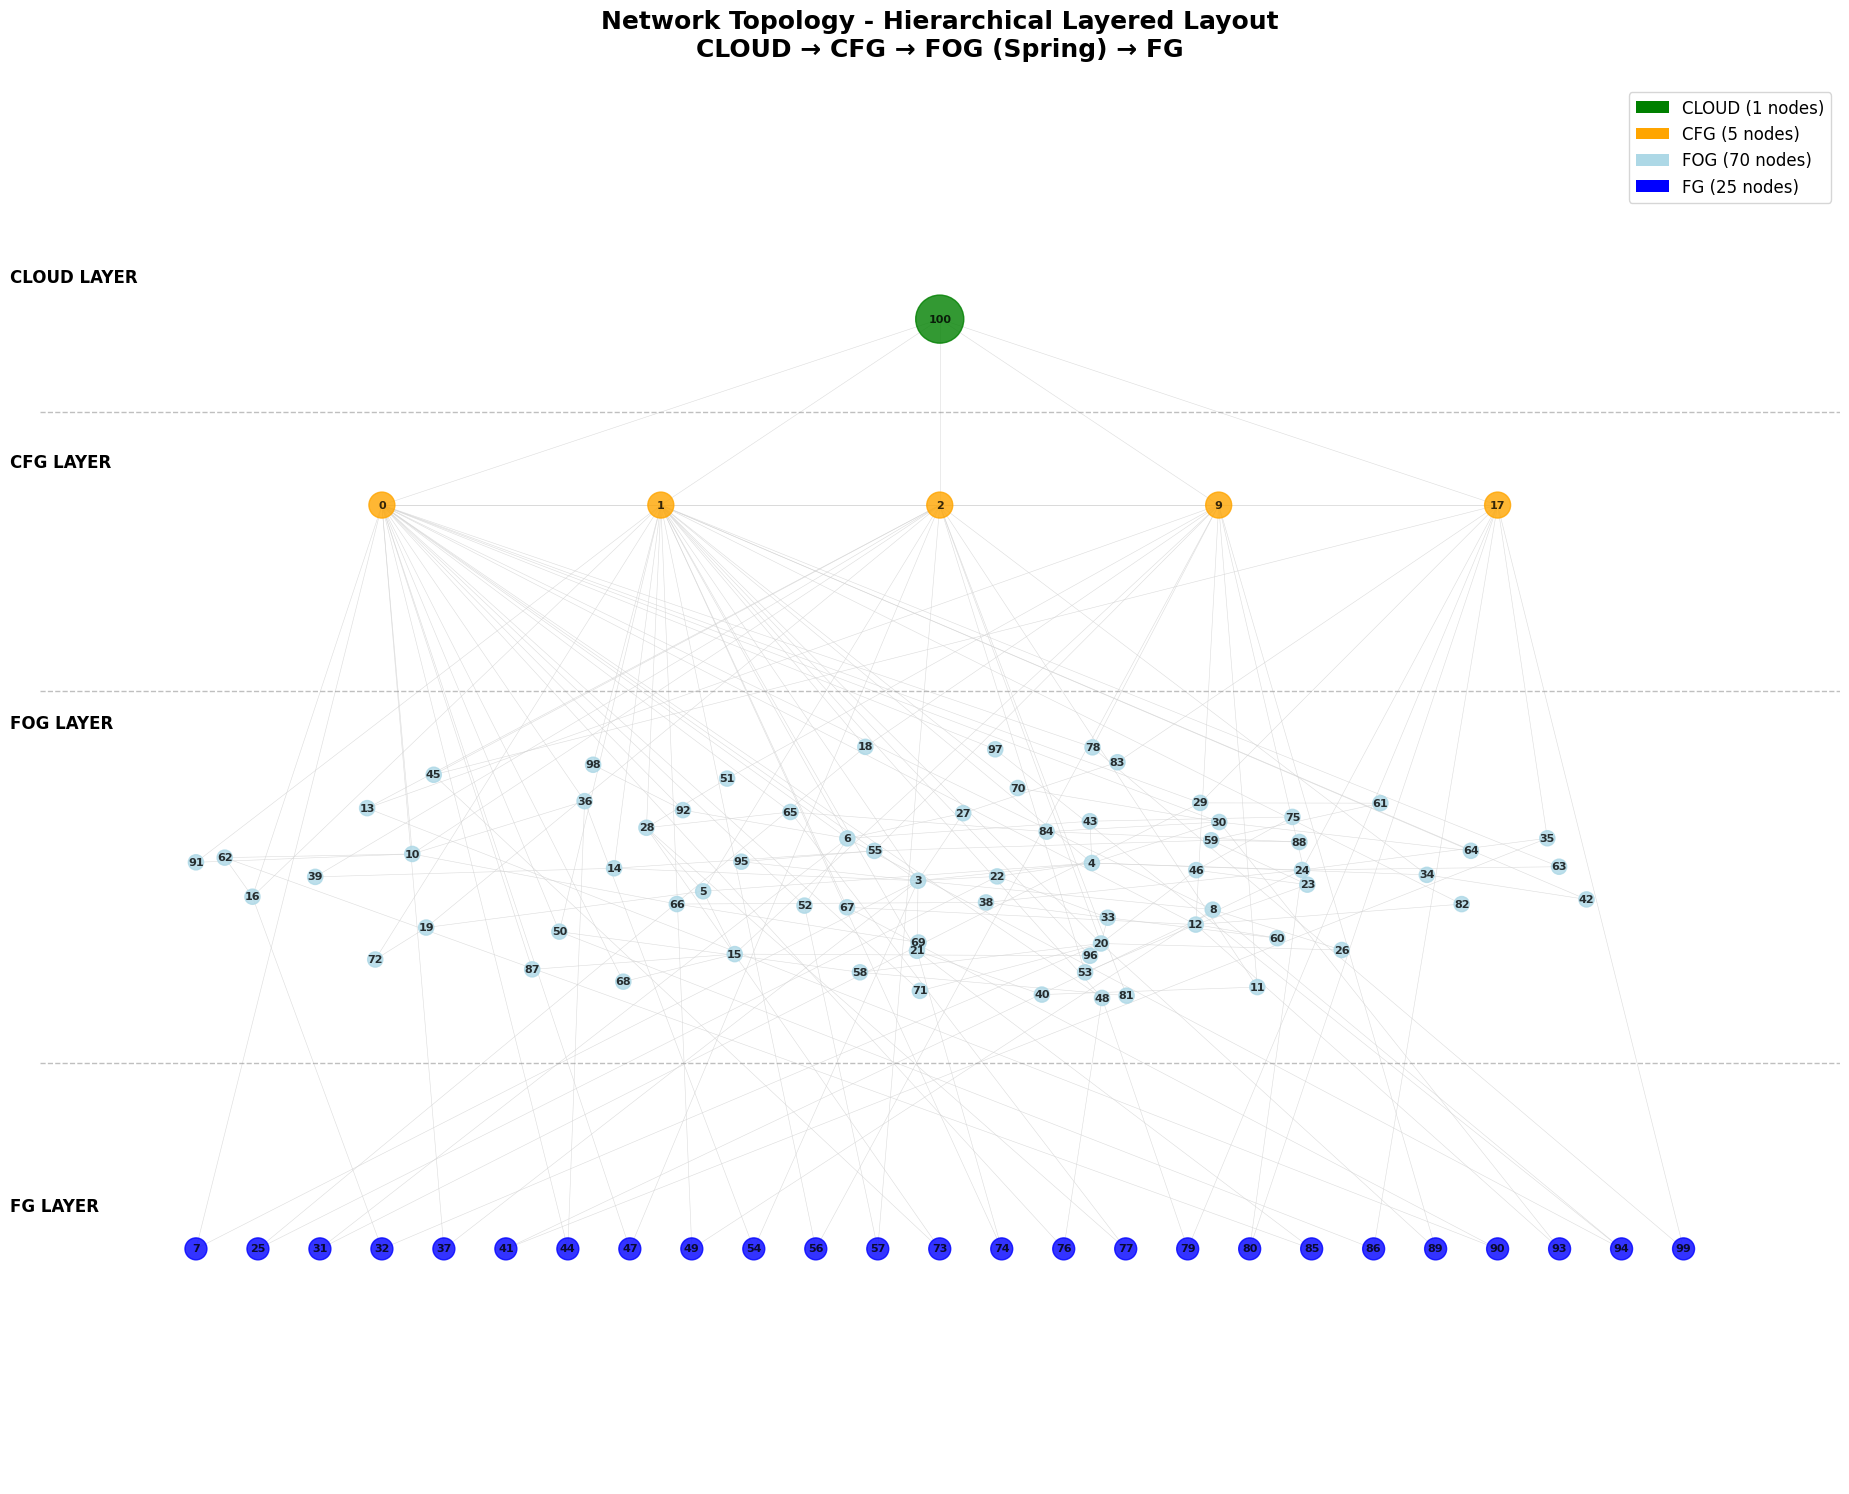


=== LAYOUT INFORMATION ===
Layer 1 (Top): CLOUD - positioned at center top
Layer 2: CFG - arranged horizontally below cloud
Layer 3: FOG - spring layout in middle area (compact)
Layer 4 (Bottom): FG - arranged horizontally at bottom

=== CLOUD CONNECTIONS ===
Cloud node 100 terhubung dengan 5 nodes: [0, 1, 2, 9, 17]

=== NODE DISTRIBUTION ===
CLOUD: 1 nodes
CFG: 5 nodes
FOG: 70 nodes
FG: 25 nodes
Total: 101 nodes


In [16]:
# Visualisasi graf NetworkX - Layout Berlapis Hierarchical
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

plt.figure(figsize=(18, 14))

# Definisikan warna untuk setiap tipe node (diurutkan sesuai hierarki)
color_map = {
    'CLOUD': 'green',
    'CFG': 'orange', 
    'FOG': 'lightblue',
    'FG': 'blue'
}

# Kategorisasi node berdasarkan type
cloud_nodes = [node for node in G.nodes() if G.nodes[node].get('type') == 'CLOUD']
cfg_nodes = [node for node in G.nodes() if G.nodes[node].get('type') == 'CFG']
fog_nodes = [node for node in G.nodes() if G.nodes[node].get('type') == 'FOG']
fg_nodes = [node for node in G.nodes() if G.nodes[node].get('type') == 'FG']

print(f"CLOUD: {len(cloud_nodes)}, CFG: {len(cfg_nodes)}, FOG: {len(fog_nodes)}, FG: {len(fg_nodes)}")

# Manual positioning untuk layout berlapis
pos = {}

# Layer 1: CLOUD (paling atas, tengah)
y_cloud = 3.0
for i, node in enumerate(cloud_nodes):
    pos[node] = (0, y_cloud)

# Layer 2: CFG (horizontal line di bawah cloud)
y_cfg = 2.0
cfg_spacing = 6.0 / max(1, len(cfg_nodes) - 1) if len(cfg_nodes) > 1 else 0
for i, node in enumerate(cfg_nodes):
    x_cfg = -3.0 + i * cfg_spacing if len(cfg_nodes) > 1 else 0
    pos[node] = (x_cfg, y_cfg)

# Layer 3: FOG (spring layout untuk fog nodes saja, di tengah)
if fog_nodes:
    # Buat subgraph hanya untuk FOG nodes
    fog_subgraph = G.subgraph(fog_nodes)
    # Spring layout khusus untuk FOG dengan area terbatas
    fog_pos = nx.spring_layout(fog_subgraph, k=0.8, iterations=100, seed=42)
    
    # Scale dan shift FOG positions ke area tengah
    y_fog = 0.0
    fog_width = 8.0  # lebar area FOG
    fog_height = 1.5  # tinggi area FOG
    
    for node in fog_nodes:
        # Scale dari [-1,1] ke area yang diinginkan
        x_scaled = fog_pos[node][0] * fog_width/2
        y_scaled = fog_pos[node][1] * fog_height/2 + y_fog
        pos[node] = (x_scaled, y_scaled)

# Layer 4: FG (horizontal line di bawah)
y_fg = -2.0
fg_spacing = 8.0 / max(1, len(fg_nodes) - 1) if len(fg_nodes) > 1 else 0
for i, node in enumerate(fg_nodes):
    x_fg = -4.0 + i * fg_spacing if len(fg_nodes) > 1 else 0
    pos[node] = (x_fg, y_fg)

# Buat list warna dan ukuran berdasarkan hierarki
node_colors = []
node_sizes = []

for node in G.nodes():
    node_type = G.nodes[node].get('type', 'FOG')
    node_colors.append(color_map.get(node_type, 'gray'))
    
    if node_type == 'CLOUD':
        size = 1200
    elif node_type == 'CFG':
        size = 350
    elif node_type == 'FOG':
        size = 120
    else:  # FG
        size = 250
    node_sizes.append(size)

# Draw graf dengan layout manual
nx.draw(G, pos, 
        node_color=node_colors, 
        node_size=node_sizes,
        with_labels=True, 
        font_size=8,
        font_weight='bold',
        font_color='black',
        edge_color='lightgray',
        width=0.4,
        alpha=0.8)

# Tambahkan garis horizontal untuk memisahkan layer
plt.axhline(y=2.5, color='gray', linestyle='--', alpha=0.5, linewidth=1)
plt.axhline(y=1.0, color='gray', linestyle='--', alpha=0.5, linewidth=1)
plt.axhline(y=-1.0, color='gray', linestyle='--', alpha=0.5, linewidth=1)

# Tambahkan label layer
plt.text(-5, 3.2, 'CLOUD LAYER', fontsize=12, fontweight='bold', ha='left')
plt.text(-5, 2.2, 'CFG LAYER', fontsize=12, fontweight='bold', ha='left')
plt.text(-5, 0.8, 'FOG LAYER', fontsize=12, fontweight='bold', ha='left')
plt.text(-5, -1.8, 'FG LAYER', fontsize=12, fontweight='bold', ha='left')

# Legend diurutkan sesuai hierarki (CLOUD, CFG, FOG, FG)
legend_elements = []
legend_order = ['CLOUD', 'CFG', 'FOG', 'FG']
for node_type in legend_order:
    color = color_map[node_type]
    count = len([n for n in G.nodes() if G.nodes[n].get('type') == node_type])
    legend_elements.append(Patch(facecolor=color, label=f'{node_type} ({count} nodes)'))

plt.legend(handles=legend_elements, loc='upper right', fontsize=12)

plt.title("Network Topology - Hierarchical Layered Layout\nCLOUD → CFG → FOG (Spring) → FG", 
          fontsize=18, fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

# Tampilkan informasi detail
print("\n=== LAYOUT INFORMATION ===")
print("Layer 1 (Top): CLOUD - positioned at center top")
print("Layer 2: CFG - arranged horizontally below cloud") 
print("Layer 3: FOG - spring layout in middle area (compact)")
print("Layer 4 (Bottom): FG - arranged horizontally at bottom")

print(f"\n=== CLOUD CONNECTIONS ===")
if cloud_nodes:
    cloud_node = cloud_nodes[0]
    cloud_neighbors = list(G.neighbors(cloud_node))
    print(f"Cloud node {cloud_node} terhubung dengan {len(cloud_neighbors)} nodes: {cloud_neighbors}")

print(f"\n=== NODE DISTRIBUTION ===")
print(f"CLOUD: {len(cloud_nodes)} nodes")
print(f"CFG: {len(cfg_nodes)} nodes") 
print(f"FOG: {len(fog_nodes)} nodes")
print(f"FG: {len(fg_nodes)} nodes")
print(f"Total: {len(G.nodes())} nodes")

## User/Workload Definition

In [4]:
import json
with open('data/usersDefinition.json', 'r') as file:
    usersDefinition = json.load(file)

"""
struktur dari usersDefinition.json:
{ 
sources:
    list of user workload, each with:
    {
        app: str, # application name
        message: str, # message to be sent
        id_resource: int # ID of the resource (device) to which the user is connected
        lambda: int # lamda value
    }
}
"""

# load set of id_resource from usersDefinition
id_resources = set()
for user in usersDefinition['sources']:
    id_resources.add(user['id_resource'])

print(f"Request user berasal dari {len(id_resources)} gateway device, yaitu:")
print(id_resources)

Request user berasal dari 25 gateway device, yaitu:
{7, 25, 31, 32, 37, 41, 44, 47, 49, 54, 56, 57, 73, 74, 76, 77, 79, 80, 85, 86, 89, 90, 93, 94, 99}


## Hasil service placement

10 application
```
Number of services in cloud (partition) (servicesInCloud): 62
Number of services in fog (partition) (servicesInFog): 205
1.7009522914886475 time for partition-based optimization

Number of services in cloud (ILP) (servicesInCloud): 62
Number of services in fog (ILP) (servicesInFog): 225
2.5376319885253906 time for ILP-based optimization
```

20 application
```
Number of services in cloud (partition) (servicesInCloud): 127
Number of services in fog (partition) (servicesInFog): 474
2.7473554611206055 time for partition-based optimization

Number of services in cloud (ILP) (servicesInCloud): 127
Number of services in fog (ILP) (servicesInFog): 521
307.02191042900085 time for ILP-based optimization
```

40 application
```
Number of services in cloud (partition) (servicesInCloud): 251
Number of services in fog (partition) (servicesInFog): 470
3.0844497680664062 time for partition-based optimization

Number of services in cloud (ILP) (servicesInCloud): 255
Number of services in fog (ILP) (servicesInFog): 527
7.306840896606445 time for ILP-based optimization
```

60 application
```
Number of services in cloud (partition) (servicesInCloud): 391
Number of services in fog (partition) (servicesInFog): 508
6.992650747299194 time for partition-based optimization

Number of services in cloud (ILP) (servicesInCloud): 391
Number of services in fog (ILP) (servicesInFog): 548
10.341204643249512 time for ILP-based optimization
```


80 application
```
Number of services in cloud (partition) (servicesInCloud): 515
Number of services in fog (partition) (servicesInFog): 460
8.166857719421387 time for partition-based optimization

Number of services in cloud (ILP) (servicesInCloud): 534
Number of services in fog (ILP) (servicesInFog): 508
12.981829404830933 time for ILP-based optimization
```

## Perhitungan latency

### Jumlah aplikasi 10

#### Partition

In [12]:
import pandas as pd

df_link_1 = pd.read_csv('results/10/results__1000000_link.csv')

display(df_link_1)

,id,type,src,dst,app,latency,message,ctime,size,buffer
0,1,LINK,54,3,1,5.000055,M.USER.APP.1,108.000000,4127711,0
1,2,LINK,94,6,1,5.000055,M.USER.APP.1,111.000000,4127711,1
2,1,LINK,3,0,1,5.000055,M.USER.APP.1,113.000055,4127711,1
3,3,LINK,77,28,4,5.000026,M.USER.APP.4,117.000000,1917857,1
4,1,LINK,0,100,1,1.000033,M.USER.APP.1,118.000110,4127711,1
...,...,...,...,...,...,...,...,...,...,...
183170,71915,LINK,0,100,8,1.000029,M.USER.APP.8,999985.000096,3617051,0
183171,71916,LINK,31,6,6,5.000043,M.USER.APP.6,999986.000000,3196115,1
183172,71916,LINK,6,0,6,5.000043,M.USER.APP.6,999991.000043,3196115,0
183173,71917,LINK,80,17,5,5.000040,M.USER.APP.5,999996.000000,2972598,1


In [13]:
# filter df_link_1 for message not starting with 'M.USER.APP.'
df_non_user_app_1 = df_link_1[~df_link_1['message'].str.startswith('M.USER.APP')]

display(df_non_user_app_1)

# average the column 'latency'
average_latency = df_non_user_app_1['latency'].mean()
print(f"\nAverage latency for non-user app messages: {average_latency:.6f} ms")

,id,type,src,dst,app,latency,message,ctime,size,buffer
137,45,LINK,28,1,8,5.000033,8_(45-52),533.782426,2450555,4
144,45,LINK,1,100,8,1.000020,8_(45-52),543.000084,2450555,1
151,58,LINK,28,1,8,5.000033,8_(45-52),587.782426,2450555,0
153,58,LINK,1,100,8,1.000020,8_(45-52),592.782459,2450555,1
579,216,LINK,28,1,8,5.000033,8_(45-52),1673.782426,2450555,0
...,...,...,...,...,...,...,...,...,...,...
183023,71854,LINK,1,100,8,1.000020,8_(45-52),999267.782459,2450555,0
183091,71885,LINK,28,1,8,5.000033,8_(45-52),999668.782426,2450555,0
183093,71885,LINK,1,100,8,1.000020,8_(45-52),999673.782459,2450555,1
183103,71887,LINK,28,1,8,5.000033,8_(45-52),999721.782426,2450555,0



Average latency for non-user app messages: 3.000026 ms


In [14]:
# filter df_link_1 for message starting with 'M.USER.APP.'
df_requester_app_1 = df_link_1[df_link_1['message'].str.startswith('M.USER.APP')]

display(df_requester_app_1)

# average the column 'latency'
average_requester_latency = df_requester_app_1['latency'].mean()
print(f"\nAverage latency for user app messages: {average_requester_latency:.6f} ms")

,id,type,src,dst,app,latency,message,ctime,size,buffer
0,1,LINK,54,3,1,5.000055,M.USER.APP.1,108.000000,4127711,0
1,2,LINK,94,6,1,5.000055,M.USER.APP.1,111.000000,4127711,1
2,1,LINK,3,0,1,5.000055,M.USER.APP.1,113.000055,4127711,1
3,3,LINK,77,28,4,5.000026,M.USER.APP.4,117.000000,1917857,1
4,1,LINK,0,100,1,1.000033,M.USER.APP.1,118.000110,4127711,1
...,...,...,...,...,...,...,...,...,...,...
183170,71915,LINK,0,100,8,1.000029,M.USER.APP.8,999985.000096,3617051,0
183171,71916,LINK,31,6,6,5.000043,M.USER.APP.6,999986.000000,3196115,1
183172,71916,LINK,6,0,6,5.000043,M.USER.APP.6,999991.000043,3196115,0
183173,71917,LINK,80,17,5,5.000040,M.USER.APP.5,999996.000000,2972598,1



Average latency for user app messages: 3.577483 ms


#### ILP

In [15]:
import pandas as pd

df_link_1 = pd.read_csv('results/10/results_ILP_1000000_link.csv')

display(df_link_1)

,id,type,src,dst,app,latency,message,ctime,size,buffer
0,1,LINK,54,3,1,5.000055,M.USER.APP.1,108.000000,4127711,0
1,1,LINK,3,0,1,5.000055,M.USER.APP.1,113.000055,4127711,0
2,3,LINK,77,28,4,5.000026,M.USER.APP.4,117.000000,1917857,1
3,1,LINK,0,100,1,1.000033,M.USER.APP.1,118.000110,4127711,1
4,4,LINK,93,12,9,5.000037,M.USER.APP.9,121.000000,2790253,1
...,...,...,...,...,...,...,...,...,...,...
178749,71915,LINK,0,100,8,1.000029,M.USER.APP.8,999985.000096,3617051,0
178750,71916,LINK,31,6,6,5.000043,M.USER.APP.6,999986.000000,3196115,1
178751,71916,LINK,6,0,6,5.000043,M.USER.APP.6,999991.000043,3196115,0
178752,71917,LINK,80,17,5,5.000040,M.USER.APP.5,999996.000000,2972598,1


In [16]:
# filter df_link_1 for message not starting with 'M.USER.APP.'
df_non_user_app_1 = df_link_1[~df_link_1['message'].str.startswith('M.USER.APP')]

display(df_non_user_app_1)

# average the column 'latency'
average_latency = df_non_user_app_1['latency'].mean()
print(f"\nAverage latency for non-user app messages: {average_latency:.6f} ms")

,id,type,src,dst,app,latency,message,ctime,size,buffer
25,8,LINK,32,16,0,5.000038,0_(0-1),271.185255,2840510,0
26,8,LINK,32,16,0,5.000050,0_(0-2),271.185255,3729110,1
28,8,LINK,16,0,0,5.000038,0_(0-1),276.185293,2840510,2
31,8,LINK,0,100,0,1.000023,0_(0-1),281.185331,2840510,2
33,8,LINK,16,0,0,5.000048,0_(2-4),315.785343,3617941,1
...,...,...,...,...,...,...,...,...,...,...
178659,71881,LINK,0,100,1,1.000030,1_(7-8),999593.950966,3725242,1
178660,71878,LINK,0,100,0,1.000029,0_(2-4),999594.785391,3617941,1
178723,71898,LINK,93,12,1,5.000050,1_(7-8),999879.950867,3725242,0
178725,71898,LINK,12,0,1,5.000050,1_(7-8),999884.950917,3725242,1



Average latency for non-user app messages: 3.587795 ms


In [17]:
# filter df_link_1 for message starting with 'M.USER.APP.'
df_requester_app_1 = df_link_1[df_link_1['message'].str.startswith('M.USER.APP')]

display(df_requester_app_1)

# average the column 'latency'
average_requester_latency = df_requester_app_1['latency'].mean()
print(f"\nAverage latency for user app messages: {average_requester_latency:.6f} ms")

,id,type,src,dst,app,latency,message,ctime,size,buffer
0,1,LINK,54,3,1,5.000055,M.USER.APP.1,108.000000,4127711,0
1,1,LINK,3,0,1,5.000055,M.USER.APP.1,113.000055,4127711,0
2,3,LINK,77,28,4,5.000026,M.USER.APP.4,117.000000,1917857,1
3,1,LINK,0,100,1,1.000033,M.USER.APP.1,118.000110,4127711,1
4,4,LINK,93,12,9,5.000037,M.USER.APP.9,121.000000,2790253,1
...,...,...,...,...,...,...,...,...,...,...
178749,71915,LINK,0,100,8,1.000029,M.USER.APP.8,999985.000096,3617051,0
178750,71916,LINK,31,6,6,5.000043,M.USER.APP.6,999986.000000,3196115,1
178751,71916,LINK,6,0,6,5.000043,M.USER.APP.6,999991.000043,3196115,0
178752,71917,LINK,80,17,5,5.000040,M.USER.APP.5,999996.000000,2972598,1



Average latency for user app messages: 3.513025 ms


### Jumlah aplikasi 20

#### Partition

In [18]:
import pandas as pd

df_link_1 = pd.read_csv('results/20/results__1000000_link.csv')

display(df_link_1)

,id,type,src,dst,app,latency,message,ctime,size,buffer
0,1,LINK,32,16,17,5.000040,M.USER.APP.17,108.000000,3036173,0
1,2,LINK,32,16,18,5.000029,M.USER.APP.18,110.000000,2175443,1
2,3,LINK,41,24,5,5.000040,M.USER.APP.5,117.000000,2972598,1
3,2,LINK,16,0,18,5.000029,M.USER.APP.18,118.000069,2175443,1
4,4,LINK,86,17,2,5.000041,M.USER.APP.2,121.000000,3078422,2
...,...,...,...,...,...,...,...,...,...,...
456294,176245,LINK,1,100,18,1.000017,M.USER.APP.18,999989.000029,2175443,2
456295,176240,LINK,28,1,3,5.000042,3_(14-15),999991.749753,3129676,1
456296,176244,LINK,0,100,4,1.000015,M.USER.APP.4,999992.000051,1917857,1
456297,176240,LINK,1,100,3,1.000025,3_(14-15),999996.749795,3129676,0


In [19]:
# filter df_link_1 for message not starting with 'M.USER.APP.'
df_non_user_app_1 = df_link_1[~df_link_1['message'].str.startswith('M.USER.APP')]

display(df_non_user_app_1)

# average the column 'latency'
average_latency = df_non_user_app_1['latency'].mean()
print(f"\nAverage latency for non-user app messages: {average_latency:.6f} ms")

,id,type,src,dst,app,latency,message,ctime,size,buffer
18,1,LINK,16,0,17,5.000025,17_(100-102),151.710851,1847652,1
19,1,LINK,16,0,17,5.000046,17_(100-107),151.710851,3460052,2
21,1,LINK,0,100,17,1.000015,17_(100-102),156.710876,1847652,2
25,1,LINK,0,100,17,1.000028,17_(100-107),161.710922,3460052,2
77,28,LINK,31,6,17,5.000046,17_(100-107),296.701176,3460052,0
...,...,...,...,...,...,...,...,...,...,...
456277,176230,LINK,0,100,17,1.000015,17_(100-102),999942.710876,1847652,3
456280,176230,LINK,0,100,17,1.000028,17_(100-107),999947.710922,3460052,2
456292,176240,LINK,77,28,3,5.000042,3_(14-15),999986.749712,3129676,2
456295,176240,LINK,28,1,3,5.000042,3_(14-15),999991.749753,3129676,1



Average latency for non-user app messages: 3.401665 ms


In [20]:
# filter df_link_1 for message starting with 'M.USER.APP.'
df_requester_app_1 = df_link_1[df_link_1['message'].str.startswith('M.USER.APP')]

display(df_requester_app_1)

# average the column 'latency'
average_requester_latency = df_requester_app_1['latency'].mean()
print(f"\nAverage latency for user app messages: {average_requester_latency:.6f} ms")

,id,type,src,dst,app,latency,message,ctime,size,buffer
0,1,LINK,32,16,17,5.000040,M.USER.APP.17,108.000000,3036173,0
1,2,LINK,32,16,18,5.000029,M.USER.APP.18,110.000000,2175443,1
2,3,LINK,41,24,5,5.000040,M.USER.APP.5,117.000000,2972598,1
3,2,LINK,16,0,18,5.000029,M.USER.APP.18,118.000069,2175443,1
4,4,LINK,86,17,2,5.000041,M.USER.APP.2,121.000000,3078422,2
...,...,...,...,...,...,...,...,...,...,...
456291,176245,LINK,56,1,18,5.000029,M.USER.APP.18,999984.000000,2175443,1
456293,176244,LINK,16,0,4,5.000026,M.USER.APP.4,999987.000026,1917857,2
456294,176245,LINK,1,100,18,1.000017,M.USER.APP.18,999989.000029,2175443,2
456296,176244,LINK,0,100,4,1.000015,M.USER.APP.4,999992.000051,1917857,1



Average latency for user app messages: 3.361461 ms


#### ILP

In [21]:
import pandas as pd

df_link_1 = pd.read_csv('results/20/results_ILP_1000000_link.csv')

display(df_link_1)

,id,type,src,dst,app,latency,message,ctime,size,buffer
0,1,LINK,32,16,17,5.000040,M.USER.APP.17,108.000000,3036173,0
1,2,LINK,32,16,18,5.000029,M.USER.APP.18,110.000000,2175443,1
2,3,LINK,41,24,5,5.000040,M.USER.APP.5,117.000000,2972598,1
3,2,LINK,16,0,18,5.000029,M.USER.APP.18,118.000069,2175443,1
4,4,LINK,86,17,2,5.000041,M.USER.APP.2,121.000000,3078422,2
...,...,...,...,...,...,...,...,...,...,...
485883,176240,LINK,77,28,3,5.000035,3_(14-18),999986.749712,2602741,3
485884,176244,LINK,16,0,4,5.000026,M.USER.APP.4,999987.000026,1917857,3
485885,176245,LINK,1,100,18,1.000017,M.USER.APP.18,999989.000029,2175443,3
485886,176244,LINK,0,100,4,1.000015,M.USER.APP.4,999992.000051,1917857,1


In [22]:
# filter df_link_1 for message not starting with 'M.USER.APP.'
df_non_user_app_1 = df_link_1[~df_link_1['message'].str.startswith('M.USER.APP')]

display(df_non_user_app_1)

# average the column 'latency'
average_latency = df_non_user_app_1['latency'].mean()
print(f"\nAverage latency for non-user app messages: {average_latency:.6f} ms")

,id,type,src,dst,app,latency,message,ctime,size,buffer
18,1,LINK,16,0,17,5.000059,17_(100-101),151.710851,4404776,1
19,1,LINK,16,0,17,5.000049,17_(100-105),151.710851,3694208,2
21,1,LINK,0,100,17,1.000035,17_(100-101),156.710910,4404776,2
25,1,LINK,0,100,17,1.000030,17_(100-105),161.710959,3694208,2
32,1,LINK,16,0,17,5.000040,17_(102-103),193.063554,2969658,1
...,...,...,...,...,...,...,...,...,...,...
485875,176232,LINK,2,100,8,1.000020,8_(45-52),999961.124211,2450555,1
485878,176230,LINK,16,0,17,5.000040,17_(102-103),999979.063554,2969658,0
485881,176230,LINK,0,100,17,1.000024,17_(102-103),999984.063594,2969658,2
485882,176240,LINK,77,28,3,5.000042,3_(14-15),999986.749712,3129676,2



Average latency for non-user app messages: 3.158018 ms


In [23]:
# filter df_link_1 for message starting with 'M.USER.APP.'
df_requester_app_1 = df_link_1[df_link_1['message'].str.startswith('M.USER.APP')]

display(df_requester_app_1)

# average the column 'latency'
average_requester_latency = df_requester_app_1['latency'].mean()
print(f"\nAverage latency for user app messages: {average_requester_latency:.6f} ms")

,id,type,src,dst,app,latency,message,ctime,size,buffer
0,1,LINK,32,16,17,5.000040,M.USER.APP.17,108.000000,3036173,0
1,2,LINK,32,16,18,5.000029,M.USER.APP.18,110.000000,2175443,1
2,3,LINK,41,24,5,5.000040,M.USER.APP.5,117.000000,2972598,1
3,2,LINK,16,0,18,5.000029,M.USER.APP.18,118.000069,2175443,1
4,4,LINK,86,17,2,5.000041,M.USER.APP.2,121.000000,3078422,2
...,...,...,...,...,...,...,...,...,...,...
485880,176245,LINK,56,1,18,5.000029,M.USER.APP.18,999984.000000,2175443,2
485884,176244,LINK,16,0,4,5.000026,M.USER.APP.4,999987.000026,1917857,3
485885,176245,LINK,1,100,18,1.000017,M.USER.APP.18,999989.000029,2175443,3
485886,176244,LINK,0,100,4,1.000015,M.USER.APP.4,999992.000051,1917857,1



Average latency for user app messages: 3.371511 ms


### Jumlah aplikasi 40

#### Partition

In [24]:
import pandas as pd

df_link_1 = pd.read_csv('results/40/results__1000000_link.csv')

display(df_link_1)

,id,type,src,dst,app,latency,message,ctime,size,buffer
0,1,LINK,94,8,3,5.000051,M.USER.APP.3,108.000000,3856532,0
1,2,LINK,99,17,4,5.000026,M.USER.APP.4,110.000000,1917857,1
2,3,LINK,93,12,27,5.000059,M.USER.APP.27,111.000000,4447423,2
3,4,LINK,86,17,32,5.000037,M.USER.APP.32,111.000000,2805631,3
4,2,LINK,17,100,4,1.000015,M.USER.APP.4,115.000026,1917857,2
...,...,...,...,...,...,...,...,...,...,...
597932,241784,LINK,0,100,24,1.000021,M.USER.APP.24,999995.000069,2589512,4
597933,241787,LINK,99,17,4,5.000026,M.USER.APP.4,999997.000000,1917857,2
597934,241777,LINK,44,0,8,5.000033,8_(45-47),999999.321272,2479749,3
597935,241777,LINK,44,0,8,5.000023,8_(45-49),999999.321272,1762012,4


In [25]:
# filter df_link_1 for message not starting with 'M.USER.APP.'
df_non_user_app_1 = df_link_1[~df_link_1['message'].str.startswith('M.USER.APP')]

display(df_non_user_app_1)

# average the column 'latency'
average_latency = df_non_user_app_1['latency'].mean()
print(f"\nAverage latency for non-user app messages: {average_latency:.6f} ms")

,id,type,src,dst,app,latency,message,ctime,size,buffer
22,6,LINK,28,1,16,5.000052,16_(92-98),152.666710,3884483,1
26,6,LINK,1,100,16,1.000031,16_(92-98),157.666762,3884483,2
29,1,LINK,8,0,3,5.000042,3_(14-15),161.597025,3129676,2
30,1,LINK,8,0,3,5.000035,3_(14-18),161.597025,2602741,3
35,1,LINK,0,100,3,1.000025,3_(14-15),166.597067,3129676,3
...,...,...,...,...,...,...,...,...,...,...
597926,241772,LINK,28,1,16,5.000021,16_(93-99),999989.642294,1611586,4
597930,241772,LINK,1,100,16,1.000026,16_(93-94),999994.642337,3206778,3
597934,241777,LINK,44,0,8,5.000033,8_(45-47),999999.321272,2479749,3
597935,241777,LINK,44,0,8,5.000023,8_(45-49),999999.321272,1762012,4



Average latency for non-user app messages: 3.108011 ms


In [26]:
# filter df_link_1 for message starting with 'M.USER.APP.'
df_requester_app_1 = df_link_1[df_link_1['message'].str.startswith('M.USER.APP')]

display(df_requester_app_1)

# average the column 'latency'
average_requester_latency = df_requester_app_1['latency'].mean()
print(f"\nAverage latency for user app messages: {average_requester_latency:.6f} ms")

,id,type,src,dst,app,latency,message,ctime,size,buffer
0,1,LINK,94,8,3,5.000051,M.USER.APP.3,108.000000,3856532,0
1,2,LINK,99,17,4,5.000026,M.USER.APP.4,110.000000,1917857,1
2,3,LINK,93,12,27,5.000059,M.USER.APP.27,111.000000,4447423,2
3,4,LINK,86,17,32,5.000037,M.USER.APP.32,111.000000,2805631,3
4,2,LINK,17,100,4,1.000015,M.USER.APP.4,115.000026,1917857,2
...,...,...,...,...,...,...,...,...,...,...
597928,241785,LINK,0,100,39,1.000019,M.USER.APP.39,999993.000032,2377749,4
597929,241783,LINK,17,100,5,1.000024,M.USER.APP.5,999994.000079,2972598,3
597931,241786,LINK,77,28,15,5.000038,M.USER.APP.15,999995.000000,2819843,4
597932,241784,LINK,0,100,24,1.000021,M.USER.APP.24,999995.000069,2589512,4



Average latency for user app messages: 3.371461 ms


#### ILP

In [27]:
import pandas as pd

df_link_1 = pd.read_csv('results/40/results_ILP_1000000_link.csv')

display(df_link_1)

,id,type,src,dst,app,latency,message,ctime,size,buffer
0,2,LINK,99,17,4,5.000026,M.USER.APP.4,110.000000,1917857,0
1,3,LINK,93,12,27,5.000059,M.USER.APP.27,111.000000,4447423,1
2,4,LINK,86,17,32,5.000037,M.USER.APP.32,111.000000,2805631,2
3,2,LINK,17,100,4,1.000015,M.USER.APP.4,115.000026,1917857,2
4,4,LINK,17,100,32,1.000022,M.USER.APP.32,116.000037,2805631,2
...,...,...,...,...,...,...,...,...,...,...
653101,241766,LINK,0,100,3,1.000020,3_(15-20),999993.117949,2491054,3
653102,241783,LINK,17,100,5,1.000024,M.USER.APP.5,999994.000079,2972598,2
653103,241786,LINK,77,28,15,5.000038,M.USER.APP.15,999995.000000,2819843,3
653104,241784,LINK,0,100,24,1.000021,M.USER.APP.24,999995.000069,2589512,3


In [28]:
# filter df_link_1 for message not starting with 'M.USER.APP.'
df_non_user_app_1 = df_link_1[~df_link_1['message'].str.startswith('M.USER.APP')]

display(df_non_user_app_1)

# average the column 'latency'
average_latency = df_non_user_app_1['latency'].mean()
print(f"\nAverage latency for non-user app messages: {average_latency:.6f} ms")

,id,type,src,dst,app,latency,message,ctime,size,buffer
20,1,LINK,94,6,3,5.000042,3_(14-15),151.725248,3129676,1
21,1,LINK,94,6,3,5.000035,3_(14-18),151.725248,2602741,2
27,1,LINK,6,0,3,5.000035,3_(14-18),161.725324,2602741,2
32,1,LINK,0,100,3,1.000021,3_(14-18),166.725359,2602741,2
51,8,LINK,77,28,35,5.000037,35_(217-221),190.976932,2744403,3
...,...,...,...,...,...,...,...,...,...,...
653086,241766,LINK,6,0,3,5.000021,3_(15-19),999978.117856,1544948,3
653087,241766,LINK,6,0,3,5.000033,3_(15-20),999978.117856,2491054,4
653091,241766,LINK,0,100,3,1.000023,3_(15-17),999983.117895,2913377,4
653097,241766,LINK,0,100,3,1.000012,3_(15-19),999988.117915,1544948,4



Average latency for non-user app messages: 3.565697 ms


In [29]:
# filter df_link_1 for message starting with 'M.USER.APP.'
df_requester_app_1 = df_link_1[df_link_1['message'].str.startswith('M.USER.APP')]

display(df_requester_app_1)

# average the column 'latency'
average_requester_latency = df_requester_app_1['latency'].mean()
print(f"\nAverage latency for user app messages: {average_requester_latency:.6f} ms")

,id,type,src,dst,app,latency,message,ctime,size,buffer
0,2,LINK,99,17,4,5.000026,M.USER.APP.4,110.000000,1917857,0
1,3,LINK,93,12,27,5.000059,M.USER.APP.27,111.000000,4447423,1
2,4,LINK,86,17,32,5.000037,M.USER.APP.32,111.000000,2805631,2
3,2,LINK,17,100,4,1.000015,M.USER.APP.4,115.000026,1917857,2
4,4,LINK,17,100,32,1.000022,M.USER.APP.32,116.000037,2805631,2
...,...,...,...,...,...,...,...,...,...,...
653100,241785,LINK,0,100,39,1.000019,M.USER.APP.39,999993.000032,2377749,3
653102,241783,LINK,17,100,5,1.000024,M.USER.APP.5,999994.000079,2972598,2
653103,241786,LINK,77,28,15,5.000038,M.USER.APP.15,999995.000000,2819843,3
653104,241784,LINK,0,100,24,1.000021,M.USER.APP.24,999995.000069,2589512,3



Average latency for user app messages: 3.324120 ms


### Jumlah aplikasi 60

#### Partition

In [30]:
import pandas as pd

df_link_1 = pd.read_csv('results/60/results__1000000_link.csv')

display(df_link_1)

,id,type,src,dst,app,latency,message,ctime,size,buffer
0,1,LINK,57,2,15,5.000038,M.USER.APP.15,108.000000,2819843,0
1,2,LINK,77,28,55,5.000039,M.USER.APP.55,109.000000,2938275,1
2,3,LINK,56,1,15,5.000038,M.USER.APP.15,111.000000,2819843,2
3,4,LINK,76,0,17,5.000040,M.USER.APP.17,111.000000,3036173,3
4,5,LINK,41,24,25,5.000038,M.USER.APP.25,111.000000,2885628,4
...,...,...,...,...,...,...,...,...,...,...
1109917,441683,LINK,1,100,40,1.000022,M.USER.APP.40,999994.000073,2729115,3
1109918,441686,LINK,86,17,0,5.000049,M.USER.APP.0,999995.000000,3691002,4
1109919,441659,LINK,0,100,34,1.000020,34_(207-214),999995.055866,2555704,3
1109920,441684,LINK,1,100,27,1.000036,M.USER.APP.27,999997.000059,4447423,2


In [31]:
# filter df_link_1 for message not starting with 'M.USER.APP.'
df_non_user_app_1 = df_link_1[~df_link_1['message'].str.startswith('M.USER.APP')]

display(df_non_user_app_1)

# average the column 'latency'
average_latency = df_non_user_app_1['latency'].mean()
print(f"\nAverage latency for non-user app messages: {average_latency:.6f} ms")

,id,type,src,dst,app,latency,message,ctime,size,buffer
101,28,LINK,8,0,21,5.000024,21_(136-137),200.382447,1776329,6
102,28,LINK,8,0,21,5.000058,21_(136-139),200.382447,4347046,7
103,28,LINK,8,0,21,5.000028,21_(136-141),200.382447,2071451,8
114,28,LINK,0,100,21,1.000014,21_(136-137),205.382471,1776329,9
129,28,LINK,0,100,21,1.000035,21_(136-139),210.382529,4347046,10
...,...,...,...,...,...,...,...,...,...,...
1109908,441659,LINK,10,0,34,5.000028,34_(207-210),999985.055792,2091535,5
1109909,441659,LINK,0,100,34,1.000024,34_(207-208),999985.055804,3007211,5
1109912,441659,LINK,10,0,34,5.000034,34_(207-214),999990.055826,2555704,3
1109913,441659,LINK,0,100,34,1.000017,34_(207-210),999990.055832,2091535,3



Average latency for non-user app messages: 3.413587 ms


In [32]:
# filter df_link_1 for message starting with 'M.USER.APP.'
df_requester_app_1 = df_link_1[df_link_1['message'].str.startswith('M.USER.APP')]

display(df_requester_app_1)

# average the column 'latency'
average_requester_latency = df_requester_app_1['latency'].mean()
print(f"\nAverage latency for user app messages: {average_requester_latency:.6f} ms")

,id,type,src,dst,app,latency,message,ctime,size,buffer
0,1,LINK,57,2,15,5.000038,M.USER.APP.15,108.000000,2819843,0
1,2,LINK,77,28,55,5.000039,M.USER.APP.55,109.000000,2938275,1
2,3,LINK,56,1,15,5.000038,M.USER.APP.15,111.000000,2819843,2
3,4,LINK,76,0,17,5.000040,M.USER.APP.17,111.000000,3036173,3
4,5,LINK,41,24,25,5.000038,M.USER.APP.25,111.000000,2885628,4
...,...,...,...,...,...,...,...,...,...,...
1109916,441685,LINK,80,17,37,5.000020,M.USER.APP.37,999994.000000,1505102,3
1109917,441683,LINK,1,100,40,1.000022,M.USER.APP.40,999994.000073,2729115,3
1109918,441686,LINK,86,17,0,5.000049,M.USER.APP.0,999995.000000,3691002,4
1109920,441684,LINK,1,100,27,1.000036,M.USER.APP.27,999997.000059,4447423,2



Average latency for user app messages: 3.343308 ms


#### ILP

In [33]:
import pandas as pd

df_link_1 = pd.read_csv('results/60/results_ILP_1000000_link.csv')

display(df_link_1)

,id,type,src,dst,app,latency,message,ctime,size,buffer
0,1,LINK,57,2,15,5.000038,M.USER.APP.15,108.000000,2819843,0
1,2,LINK,77,28,55,5.000039,M.USER.APP.55,109.000000,2938275,1
2,3,LINK,56,1,15,5.000038,M.USER.APP.15,111.000000,2819843,2
3,4,LINK,76,0,17,5.000040,M.USER.APP.17,111.000000,3036173,3
4,5,LINK,41,24,25,5.000038,M.USER.APP.25,111.000000,2885628,4
...,...,...,...,...,...,...,...,...,...,...
1120479,441685,LINK,80,17,37,5.000020,M.USER.APP.37,999994.000000,1505102,2
1120480,441683,LINK,1,100,40,1.000022,M.USER.APP.40,999994.000073,2729115,2
1120481,441686,LINK,86,17,0,5.000049,M.USER.APP.0,999995.000000,3691002,3
1120482,441684,LINK,1,100,27,1.000036,M.USER.APP.27,999997.000059,4447423,2


In [34]:
# filter df_link_1 for message not starting with 'M.USER.APP.'
df_non_user_app_1 = df_link_1[~df_link_1['message'].str.startswith('M.USER.APP')]

display(df_non_user_app_1)

# average the column 'latency'
average_latency = df_non_user_app_1['latency'].mean()
print(f"\nAverage latency for non-user app messages: {average_latency:.6f} ms")

,id,type,src,dst,app,latency,message,ctime,size,buffer
150,36,LINK,13,2,50,5.000029,50_(327-328),225.781927,2192612,8
151,36,LINK,13,2,50,5.000038,50_(327-329),225.781927,2827770,9
152,36,LINK,13,2,50,5.000024,50_(327-330),225.781927,1818114,10
153,36,LINK,13,2,50,5.000035,50_(327-331),225.781927,2648514,11
154,36,LINK,13,2,50,5.000031,50_(327-332),225.781927,2350018,12
...,...,...,...,...,...,...,...,...,...,...
1120382,441632,LINK,2,100,50,1.000018,50_(327-328),999890.781956,2192612,8
1120388,441632,LINK,2,100,50,1.000023,50_(327-329),999895.781994,2827770,8
1120395,441632,LINK,2,100,50,1.000015,50_(327-330),999900.782018,1818114,3
1120399,441632,LINK,2,100,50,1.000021,50_(327-331),999905.782053,2648514,3



Average latency for non-user app messages: 3.395852 ms


In [35]:
# filter df_link_1 for message starting with 'M.USER.APP.'
df_requester_app_1 = df_link_1[df_link_1['message'].str.startswith('M.USER.APP')]

display(df_requester_app_1)

# average the column 'latency'
average_requester_latency = df_requester_app_1['latency'].mean()
print(f"\nAverage latency for user app messages: {average_requester_latency:.6f} ms")

,id,type,src,dst,app,latency,message,ctime,size,buffer
0,1,LINK,57,2,15,5.000038,M.USER.APP.15,108.000000,2819843,0
1,2,LINK,77,28,55,5.000039,M.USER.APP.55,109.000000,2938275,1
2,3,LINK,56,1,15,5.000038,M.USER.APP.15,111.000000,2819843,2
3,4,LINK,76,0,17,5.000040,M.USER.APP.17,111.000000,3036173,3
4,5,LINK,41,24,25,5.000038,M.USER.APP.25,111.000000,2885628,4
...,...,...,...,...,...,...,...,...,...,...
1120479,441685,LINK,80,17,37,5.000020,M.USER.APP.37,999994.000000,1505102,2
1120480,441683,LINK,1,100,40,1.000022,M.USER.APP.40,999994.000073,2729115,2
1120481,441686,LINK,86,17,0,5.000049,M.USER.APP.0,999995.000000,3691002,3
1120482,441684,LINK,1,100,27,1.000036,M.USER.APP.27,999997.000059,4447423,2



Average latency for user app messages: 3.331942 ms


### Jumlah aplikasi 80

#### Partition

In [36]:
import pandas as pd

df_link_1 = pd.read_csv('results/80/results__1000000_link.csv')

display(df_link_1)

,id,type,src,dst,app,latency,message,ctime,size,buffer
0,1,LINK,76,0,42,5.000023,M.USER.APP.42,109.000000,1737538,0
1,2,LINK,86,17,3,5.000051,M.USER.APP.3,111.000000,3856532,1
2,3,LINK,57,2,26,5.000033,M.USER.APP.26,113.000000,2468994,2
3,4,LINK,76,0,64,5.000053,M.USER.APP.64,113.000000,3979358,3
4,1,LINK,0,100,42,1.000014,M.USER.APP.42,114.000023,1737538,3
...,...,...,...,...,...,...,...,...,...,...
1149437,480718,LINK,1,100,43,1.000026,M.USER.APP.43,999995.000043,3214768,2
1149438,480721,LINK,90,13,47,5.000032,M.USER.APP.47,999996.000000,2414505,3
1149439,480720,LINK,2,100,24,1.000021,M.USER.APP.24,999999.000035,2589512,2
1149440,480719,LINK,12,0,13,5.000043,M.USER.APP.13,999999.000043,3232731,2


In [37]:
# filter df_link_1 for message not starting with 'M.USER.APP.'
df_non_user_app_1 = df_link_1[~df_link_1['message'].str.startswith('M.USER.APP')]

display(df_non_user_app_1)

# average the column 'latency'
average_latency = df_non_user_app_1['latency'].mean()
print(f"\nAverage latency for non-user app messages: {average_latency:.6f} ms")

,id,type,src,dst,app,latency,message,ctime,size,buffer
267,100,LINK,8,0,49,5.000056,49_(318-319),323.678166,4237364,5
274,100,LINK,0,100,49,1.000034,49_(318-319),328.678223,4237364,5
282,103,LINK,18,1,49,5.000056,49_(318-319),335.026112,4237364,3
286,103,LINK,1,100,49,1.000034,49_(318-319),340.026169,4237364,3
297,115,LINK,24,17,67,5.000028,67_(437-438),348.145567,2085650,6
...,...,...,...,...,...,...,...,...,...,...
1148734,480391,LINK,0,100,75,1.000022,75_(481-483),999336.000113,2778322,6
1148743,480391,LINK,0,100,75,1.000025,75_(481-484),999341.000154,3116311,7
1149263,480628,LINK,8,0,49,5.000056,49_(318-319),999834.678166,4237364,2
1149267,480628,LINK,0,100,49,1.000034,49_(318-319),999839.678223,4237364,2



Average latency for non-user app messages: 3.214085 ms


In [38]:
# filter df_link_1 for message starting with 'M.USER.APP.'
df_requester_app_1 = df_link_1[df_link_1['message'].str.startswith('M.USER.APP')]

display(df_requester_app_1)

# average the column 'latency'
average_requester_latency = df_requester_app_1['latency'].mean()
print(f"\nAverage latency for user app messages: {average_requester_latency:.6f} ms")

,id,type,src,dst,app,latency,message,ctime,size,buffer
0,1,LINK,76,0,42,5.000023,M.USER.APP.42,109.000000,1737538,0
1,2,LINK,86,17,3,5.000051,M.USER.APP.3,111.000000,3856532,1
2,3,LINK,57,2,26,5.000033,M.USER.APP.26,113.000000,2468994,2
3,4,LINK,76,0,64,5.000053,M.USER.APP.64,113.000000,3979358,3
4,1,LINK,0,100,42,1.000014,M.USER.APP.42,114.000023,1737538,3
...,...,...,...,...,...,...,...,...,...,...
1149436,480720,LINK,57,2,24,5.000035,M.USER.APP.24,999994.000000,2589512,3
1149437,480718,LINK,1,100,43,1.000026,M.USER.APP.43,999995.000043,3214768,2
1149438,480721,LINK,90,13,47,5.000032,M.USER.APP.47,999996.000000,2414505,3
1149439,480720,LINK,2,100,24,1.000021,M.USER.APP.24,999999.000035,2589512,2



Average latency for user app messages: 3.323852 ms


#### ILP

In [39]:
import pandas as pd

df_link_1 = pd.read_csv('results/80/results_ILP_1000000_link.csv')

display(df_link_1)

,id,type,src,dst,app,latency,message,ctime,size,buffer
0,1,LINK,76,0,42,5.000023,M.USER.APP.42,109.000000,1737538,0
1,2,LINK,86,17,3,5.000051,M.USER.APP.3,111.000000,3856532,1
2,3,LINK,57,2,26,5.000033,M.USER.APP.26,113.000000,2468994,2
3,4,LINK,76,0,64,5.000053,M.USER.APP.64,113.000000,3979358,3
4,1,LINK,0,100,42,1.000014,M.USER.APP.42,114.000023,1737538,3
...,...,...,...,...,...,...,...,...,...,...
1186114,480720,LINK,2,100,24,1.000021,M.USER.APP.24,999999.000035,2589512,2
1186115,480719,LINK,12,0,13,5.000043,M.USER.APP.13,999999.000043,3232731,2
1186116,480680,LINK,16,0,52,5.000059,52_(340-341),999999.014920,4449121,3
1186117,480680,LINK,16,0,52,5.000044,52_(340-343),999999.014920,3322818,4


In [40]:
# filter df_link_1 for message not starting with 'M.USER.APP.'
df_non_user_app_1 = df_link_1[~df_link_1['message'].str.startswith('M.USER.APP')]

display(df_non_user_app_1)

# average the column 'latency'
average_latency = df_non_user_app_1['latency'].mean()
print(f"\nAverage latency for non-user app messages: {average_latency:.6f} ms")

,id,type,src,dst,app,latency,message,ctime,size,buffer
172,61,LINK,47,0,67,5.000028,67_(437-438),232.151448,2085650,2
175,61,LINK,0,100,67,1.000017,67_(437-438),237.151475,2085650,2
291,115,LINK,35,17,67,5.000028,67_(437-438),349.334814,2085650,7
292,115,LINK,35,41,67,5.000057,67_(437-439),349.334814,4301465,8
298,103,LINK,25,18,49,5.000027,49_(319-320),353.998936,2004048,7
...,...,...,...,...,...,...,...,...,...,...
1186031,480678,LINK,47,0,67,5.000028,67_(437-438),999931.151448,2085650,2
1186036,480678,LINK,0,100,67,1.000017,67_(437-438),999936.151475,2085650,3
1186116,480680,LINK,16,0,52,5.000059,52_(340-341),999999.014920,4449121,3
1186117,480680,LINK,16,0,52,5.000044,52_(340-343),999999.014920,3322818,4



Average latency for non-user app messages: 3.395452 ms


In [41]:
# filter df_link_1 for message starting with 'M.USER.APP.'
df_requester_app_1 = df_link_1[df_link_1['message'].str.startswith('M.USER.APP')]

display(df_requester_app_1)

# average the column 'latency'
average_requester_latency = df_requester_app_1['latency'].mean()
print(f"\nAverage latency for user app messages: {average_requester_latency:.6f} ms")

,id,type,src,dst,app,latency,message,ctime,size,buffer
0,1,LINK,76,0,42,5.000023,M.USER.APP.42,109.000000,1737538,0
1,2,LINK,86,17,3,5.000051,M.USER.APP.3,111.000000,3856532,1
2,3,LINK,57,2,26,5.000033,M.USER.APP.26,113.000000,2468994,2
3,4,LINK,76,0,64,5.000053,M.USER.APP.64,113.000000,3979358,3
4,1,LINK,0,100,42,1.000014,M.USER.APP.42,114.000023,1737538,3
...,...,...,...,...,...,...,...,...,...,...
1186111,480720,LINK,57,2,24,5.000035,M.USER.APP.24,999994.000000,2589512,3
1186112,480718,LINK,1,100,43,1.000026,M.USER.APP.43,999995.000043,3214768,2
1186113,480721,LINK,90,13,47,5.000032,M.USER.APP.47,999996.000000,2414505,3
1186114,480720,LINK,2,100,24,1.000021,M.USER.APP.24,999999.000035,2589512,2



Average latency for user app messages: 3.322545 ms


## Load networkDefinition.json dan convert ke NetworkX

In [45]:
# Load data/networkDefinition.json and convert to NetworkX topology
import json
import networkx as nx

# Load the JSON file
with open('data/networkDefinition.json', 'r') as f:
    network_data = json.load(f)

# Create NetworkX graph following the pattern from topology.py
G = nx.Graph()

# Add edges with bandwidth (BW) and propagation delay (PR) attributes
for edge in network_data["link"]:
    G.add_edge(edge["s"], edge["d"], BW=edge["BW"], PR=edge["PR"])

# Prepare node attributes dictionaries
values_IPT = {}
values_RAM = {}
node_attributes = {}

# Process node entities and set attributes
for node in network_data["entity"]:
    node_id = node["id"]
    
    # Store in node_attributes dictionary (following topology.py pattern)
    node_attributes[node_id] = node
    
    # Set IPT values (default to 0 if not present)
    try:
        values_IPT[node_id] = node["IPT"]
    except KeyError:
        values_IPT[node_id] = 0
    
    # Set RAM values (default to 0 if not present)
    try:
        values_RAM[node_id] = node["RAM"]
    except KeyError:
        values_RAM[node_id] = 0

# Set node attributes in NetworkX graph
nx.set_node_attributes(G, values=values_IPT, name="IPT")
nx.set_node_attributes(G, values=values_RAM, name="RAM")

# Also set any additional attributes (like 'type' for cloud nodes)
for node in network_data["entity"]:
    node_id = node["id"]
    for attr_name, attr_value in node.items():
        if attr_name not in ["id", "IPT", "RAM"]:  # Skip already processed attributes
            nx.set_node_attributes(G, {node_id: attr_value}, name=attr_name)

print("Network topology loaded successfully!")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Node attributes: {list(G.nodes(data=True))[0] if G.nodes() else 'No nodes'}")
print(f"Edge attributes: {list(G.edges(data=True))[0] if G.edges() else 'No edges'}")

# Find cloud nodes (nodes with type="CLOUD")
cloud_nodes = [node_id for node_id, attr in G.nodes(data=True) if attr.get('type') == 'CLOUD']
print(f"Cloud nodes found: {cloud_nodes}")

Network topology loaded successfully!
Number of nodes: 101
Number of edges: 201
Node attributes: (0, {'IPT': 770, 'RAM': 10})
Edge attributes: (0, 1, {'BW': 75000, 'PR': 5})
Cloud nodes found: [100]


## Load DataFrame

Jumlah aplikasi = 10

In [42]:
# load file results/10/Results__1000000_0.csv kemudian simpan pada pandas dataframe
import pandas as pd
df = pd.read_csv('results/10/results__1000000.csv')
# tampilkan 5 baris pertama dari dataframe
df.head()

,id,type,app,module,message,DES.src,DES.dst,TOPO.src,TOPO.dst,module.src,service,time_in,time_out,time_emit,time_reception
0,2,COMP_M,1,1_7,M.USER.APP.1,5,76,94,6,NaN,53.809524,116.000055,169.809579,111.000000,116.000055
1,1,COMP_M,1,1_7,M.USER.APP.1,2,78,54,100,NaN,4.633000,119.000143,123.633143,108.000000,119.000143
2,1,COMP_M,1,1_8,1_(7-8),78,81,100,100,1_7,5.809900,123.633143,129.443043,123.633143,123.633143
3,3,COMP_M,4,4_22,M.USER.APP.4,12,168,77,100,NaN,5.700200,128.000066,133.700266,117.000000,128.000066
4,4,COMP_M,9,9_55,M.USER.APP.9,35,370,93,100,NaN,4.749800,132.000097,136.749897,121.000000,132.000097


In [43]:
# filter df for message starting with 'M.USER.APP.'
df_user_app = df[df['message'].str.startswith('M.USER.APP')]
df_user_app

,id,type,app,module,message,DES.src,DES.dst,TOPO.src,TOPO.dst,module.src,service,time_in,time_out,time_emit,time_reception
0,2,COMP_M,1,1_7,M.USER.APP.1,5,76,94,6,NaN,53.809524,116.000055,1.698096e+02,111.0,116.000055
1,1,COMP_M,1,1_7,M.USER.APP.1,2,78,54,100,NaN,4.633000,119.000143,1.236331e+02,108.0,119.000143
3,3,COMP_M,4,4_22,M.USER.APP.4,12,168,77,100,NaN,5.700200,128.000066,1.337003e+02,117.0,128.000066
4,4,COMP_M,9,9_55,M.USER.APP.9,35,370,93,100,NaN,4.749800,132.000097,1.367499e+02,121.0,132.000097
20,5,COMP_M,1,1_7,M.USER.APP.1,3,78,79,100,NaN,4.633000,153.000088,1.576331e+02,147.0,153.000088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437226,71912,COMP_M,4,4_22,M.USER.APP.4,8,168,7,100,NaN,5.700200,999933.000041,9.999387e+05,999927.0,999933.000041
437236,71914,COMP_M,1,1_7,M.USER.APP.1,3,78,79,100,NaN,4.633000,999972.000088,9.999766e+05,999966.0,999972.000088
437237,71913,COMP_M,4,4_22,M.USER.APP.4,11,168,73,100,NaN,5.700200,999974.000066,9.999797e+05,999963.0,999974.000066
437247,71915,COMP_M,8,8_45,M.USER.APP.8,26,323,54,100,NaN,4.406900,999986.000125,9.999904e+05,999975.0,999986.000125


## ADRA (Average Delay Requester to Application entry point)

In [47]:
import networkx as nx

def calculate_adra(fs, fd):
    """
    Calculate the Average Delay from Requester to Application (ADRA)
    
    Parameters:
    fs (int): Client ID (source node)
    fd (int): Application entry point ID (destination node)
    
    Returns:
    float: Average delay in milliseconds, or inf if no path exists
    """
    path = nx.shortest_path(G, source=fs, target=fd)
    print("Path:", path)
    print("Path length:", len(path))
    
    reqAppDelay = []

    if len(path) == 1:
        reqAppDelay.append(0)

    for i in range(len(path) - 1):
        current_node = path[i]
        next_node = path[i + 1]
        
        # Get edge attributes (bandwith and PD)
        edge_attrs = G.edges[current_node, next_node]
        bandwidth = edge_attrs['BW']
        propagation_delay = edge_attrs['PR']
        print(f"PR: {propagation_delay}, BW: {bandwidth}")

        # Get packet size from df_apps
        packet_size = 1917857  # Example packet size in bytes, can be replaced with actual message size
        delay = propagation_delay + (packet_size / (bandwidth * 1000000.0 )) # delay in ms
        print("Delay:", delay)
        reqAppDelay.append(delay)

    return sum(reqAppDelay) / len(reqAppDelay) if reqAppDelay else float('inf')

# get first data from df_user_app
sample_delay_data = df_user_app.iloc[2]
print("Message:", sample_delay_data['message'])
check_delay = calculate_adra(sample_delay_data['TOPO.src'], sample_delay_data['TOPO.dst'])
print("ADRA from node 97 to node 100:", check_delay)

Message: M.USER.APP.4
Path: [np.int64(77), 28, 1, np.int64(100)]
Path length: 4
PR: 5, BW: 75000
Delay: 5.000025571426667
PR: 5, BW: 75000
Delay: 5.000025571426667
PR: 1, BW: 125000
Delay: 1.000015342856
ADRA from node 97 to node 100: 3.6666888285697774


## Meet Deadline

### Jumlah aplikasi 10

In [48]:
df_1 = pd.read_csv('results/10/results__1000000.csv')

# load data/appDefinition.json
with open('data/10/appDefinition.json', 'r') as f:
    app_data = json.load(f)

for app in app_data:
    print(f"App name: {app['name']}, Deadline: {app['deadline']}")

# add new column 'time_response' with calculating column 'time_out' - 'time_emit'
df_1['time_response'] = df_1['time_out'] - df_1['time_emit']
display(df_1)

App name: 0, Deadline: 5113
App name: 1, Deadline: 4512
App name: 2, Deadline: 4889
App name: 3, Deadline: 3412
App name: 4, Deadline: 3536
App name: 5, Deadline: 4020
App name: 6, Deadline: 5469
App name: 7, Deadline: 3387
App name: 8, Deadline: 3709
App name: 9, Deadline: 3933


,id,type,app,module,message,DES.src,DES.dst,TOPO.src,TOPO.dst,module.src,service,time_in,time_out,time_emit,time_reception,time_response
0,2,COMP_M,1,1_7,M.USER.APP.1,5,76,94,6,NaN,53.809524,116.000055,1.698096e+02,111.000000,116.000055,58.809579
1,1,COMP_M,1,1_7,M.USER.APP.1,2,78,54,100,NaN,4.633000,119.000143,1.236331e+02,108.000000,119.000143,15.633143
2,1,COMP_M,1,1_8,1_(7-8),78,81,100,100,1_7,5.809900,123.633143,1.294430e+02,123.633143,123.633143,5.809900
3,3,COMP_M,4,4_22,M.USER.APP.4,12,168,77,100,NaN,5.700200,128.000066,1.337003e+02,117.000000,128.000066,16.700266
4,4,COMP_M,9,9_55,M.USER.APP.9,35,370,93,100,NaN,4.749800,132.000097,1.367499e+02,121.000000,132.000097,15.749897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437253,71915,COMP_M,8,8_48,8_(47-48),333,338,100,100,8_47,4.880900,999995.921625,1.000001e+06,999995.921625,999995.921625,4.880900
437254,71915,COMP_M,8,8_50,8_(47-50),333,348,100,100,8_47,2.317700,999995.921625,9.999982e+05,999995.921625,999995.921625,2.317700
437255,71915,COMP_M,8,8_51,8_(47-51),333,353,100,100,8_47,4.842700,999995.921625,1.000001e+06,999995.921625,999995.921625,4.842700
437256,71915,COMP_M,8,8_53,8_(47-53),333,363,100,100,8_47,3.722100,999995.921625,9.999996e+05,999995.921625,999995.921625,3.722100


In [ ]:
# sum 'time_response' group by 'id' and 'app'
df_response_time = df_1.groupby(['id', 'app'])['time_response'].sum().reset_index()
df_response_time.rename(columns={'time_response': 'total_response_time'}, inplace=True)

# then compare total_response_time with app deadline
# add new column for conditional named 'meet_deadline'. if total_response_time < app deadline, then mark it as 'Yes', otherwise 'No'
# use this app_data[0]['deadline'] to find the deadline for each app
df_response_time['meet_deadline'] = df_response_time.apply(
    lambda row: 'Yes' if row['total_response_time'] < app_data[int(row['app'])]['deadline'] else 'No', axis=1
)

display(df_response_time)

,id,app,total_response_time,meet_deadline
0,1,1,21.443043,Yes
1,2,1,126.288092,Yes
2,3,4,52.086266,Yes
3,4,9,39.756597,Yes
4,5,1,16.442988,Yes
...,...,...,...,...
71911,71912,4,47.086241,Yes
71912,71913,4,52.086266,Yes
71913,71914,1,16.442988,Yes
71914,71915,8,46.746125,Yes
